<a href="https://colab.research.google.com/github/narukawamasa/python_smple/blob/main/neural_network_editor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニューラルネット実装

1. データの特徴について確認します。（13問）
    - 各変数のデータ型、行列数、統計量を算出し、今回扱うデータの外観を把握します。
2. データを加工する方法について学習します。（7問）
    - 各変数をモデルに入れる形に整えます。（特徴量生成フェーズ）
3. ニューラルネットワークのモデリング方法について学習します。（19問）
    - ディープラーニングのモデリングと精度を上げるときのポイントについて学習します。
4. CNNについて学習します。（17問）
    - 画像データに対して相性の良いCNNモデルについて学習します。
5. RNNについて学習します。（15問）
    - 時系列、テキストデータ等に対して相性の良いRNNモデルについて学習します。

### 0. 事前準備

#### 0.1  必要なライブラリを読み込んで下さい。

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# 目的変数の加工処理で必要なライブラリ
from keras.utils.np_utils import to_categorical

# Jupyter 上で図を表示するためのコマンド
%matplotlib inline

# warningを表示させない
warnings.simplefilter('ignore')

#### 0.2 minstを読み込んで、学習データ（説明変数）、学習データ（目的変数）、検証データ（説明変数）、検証データ（目的変数）にデータを格納してください。

In [44]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### 1.データの特徴について確認します。

#### 1.1説明変数の学習データ（X_train）の レコード数を確認してください。

In [45]:
print(len(X_train))

60000


#### 1.2 目的変数の学習データ（y_train）レコード数を確認してください。

In [46]:
print(len(y_train))

60000


#### 1.3（X_train）の行列数（各次元の要素数）を確認してください。

In [47]:
print(X_train.shape)

(60000, 28, 28)


#### 1.4 今回の学習データは3次元の性質を持っているようです。今度は正解データの性質を確認してみましょう。（y_train）の行列数を確認してください。

In [48]:
print(y_train.shape)

(60000,)


#### 1.5 正解データは1次元です。X_trainの1番目（indexは0）のデータの中身を確認してみましょう。

In [49]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

#### 1.6 同様にy_trainのデータの中身を確認してみましょう。

In [50]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

#### 1.7 y_trainの要素の集計を行いましょう。

In [51]:
pd.Series(y_train).value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

#### 1.8 目的変数は0～9までの数字が割り当てられているようです。説明変数と目的変数それぞれの学習データ、検証データの次元数を確認してみましょう。

In [52]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (60000, 28, 28)
y_train (60000,)
X_test (10000, 28, 28)
y_test (10000,)


#### 1.9 学習データは60000件、検証データは10000件、学習データの要素数は28×28、それに対して0～9の正解データが存在していることが分かりました。最初の学習データ（indexは0）を可視化してみましょう。※ヒント：「plt.imshow」を使用してください。

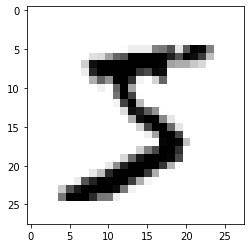

In [53]:
digit = X_train[0]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

#### 1.10 色の濃さはどのように表現されているのでしょうか。最初の学習データ（0番目）の最初の要素（0番目）を出力してください。

In [54]:
X_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

#### 1.11 最初の学習データ（indexは0）の6番目の要素（indexは5）を出力してください。※画像と数字を比較して見てください。

In [55]:
X_train[0][5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
         0,   0], dtype=uint8)

#### 1.12 最初の学習データ（indexは0）を転置させて、6番目の要素（indexは5）を出力してください。※画像と数字を比較して見てください。

In [56]:
X_train[0].T[5]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 172, 253,   0,
         0,   0], dtype=uint8)

#### 1.13 学習データの構成は（60000,28,28）＝（枚数,横座標,縦座標）を表しており、数字が小さいと「白」、大きいと「黒」を表現しているようです。最後にtrain_xの最大値、最小値を確認してみましょう。

In [57]:
print(X_train.max())
print(X_train.min())

255
0


### 2.データの加工方法について学習します。

#### 2.1 kerasに入れる形にデータを整えていきましょう。まず、28×28の画像データ（X_train,X_test）を全て（60000枚）1次元化してください。

In [58]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
print('X_train', X_train.shape)
print('X_test', X_test.shape)

X_train (60000, 784)
X_test (10000, 784)


#### 2.2 ディープラーニングは正規化処理を施した方が適切な結果が出ることが多いです。28×28の画像データ（X_train,X_test）の最大値が1になるように正規化してください。

In [59]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
print("X_train_max:",X_train.max())
print("X_test_min:",X_test.min())

X_train_max: 1.0
X_test_min: 0.0


#### 2.3 目的変数の形を「0」、「1」だけで表す必要があります。整数値を2値クラスの配列に変換した上で、y_trainを上から5行表示してください。※ワンホットエンコーディング処理といいます。

In [60]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

#### 2.4 説明変数と目的変数の形式は整いました。それでは各ノードにおける「入力」と「出力」のイメージを理解していきましょう。下記の様な「2×3」の行列を作成して、「w」と言う変数に格納して下さい。同様に「3×1」の行列を作成し、「x」という変数に格納して下さい。

In [63]:
w = np.array([[1,2,3],[4,5,6]])
x = np.array([[1],[-2],[-3]])
print('----w----')
print(w)
print('----x----')
print(x)

----w----
[[1 2 3]
 [4 5 6]]
----x----
[[ 1]
 [-2]
 [-3]]


#### 2.5 「3個のデータ」である「x」に重み「w」をかけ合わせて「2個のデータ」を出力してみましょう。※行列演算を行います。ニューラルネットワークはデータに重みをかけ合わせて新たな数値を出力し、その数値を活性化関数で変換して出てきた値を次の層の入力とすることの繰り返しです。

In [64]:
np.dot(w,x)

array([[-12],
       [-24]])

#### 2.6 活性化関数のイメージを掴んでいきましょう。「2.5」で算出した行列に、活性化関数の一種である「シグモイド関数」をかけて値を算出して下さい。※値が0～1の間に収まる関数です。kerasでは引数で設定することができます。

In [65]:
z = np.dot(w,x)
1 / (1 + np.exp(-z))

array([[6.14417460e-06],
       [3.77513454e-11]])

#### 2.7 活性化関数のイメージを掴んでいきましょう。「2.5」で算出した行列に、活性化関数の一種である「relu」をかけて値を算出して下さい。※正の値はそのまま、負の値は「0」に変換する関数です。kerasでは引数で設定することができます。

In [66]:
z = np.dot(w,x)
np.maximum(0,z)

array([[0],
       [0]])

### 3.ニューラルネットワークのモデリング方法について学習します。※layerの名前、精度結果が一致している必要は無いです。また、モデリングの実行後、時間がかかる処理があります。

#### 3.1 Sequentialのクラスを読み込んでください。

In [67]:
from keras.models import Sequential
print(Sequential)

<class 'keras.engine.sequential.Sequential'>


#### 3.2 全結合レイヤーである「Dense」のクラスを読み込んで下さい。

In [68]:
from keras.layers import Dense
print(Dense)

<class 'keras.layers.core.dense.Dense'>


#### 3.3 今回は「Sequentialモデル」を使用して、ニューラルネットワークを構築していきましょう。「784」件の入力を受け取り、「32」件の出力を返し、活性化関数が「シグモイド関数」の層を作成してください。※32件にしている理由は特にありません。

In [69]:
model = Sequential()
image_size = 784
model.add(Dense(32, activation='sigmoid', input_dim=image_size))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


#### 3.4 「10」件の出力を返す、活性化関数がソフトマックス関数の出力層を追加し、サマリーを出力して下さい。

In [70]:
num_classes = 10
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


#### 3.5 学習方法をcompile関数で設定しましょう。最適化関数を「確率的勾配降下法（Stochastic gradient descent）」を選択して下さい。誤差関数を「categorical_crossentropy」で設定し、metricsは「正解率」を設定してみましょう。※何を目的として重みを更新するかを決定している部分になります。※確率的勾配降下法は難しい概念なので、本コンテンツでは説明しません。詳しく知りたい方は調べてみて下さい。

In [71]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### 3.6 学習を実行しましょう。fit関数に学習データを当てはめて下さい。

In [72]:
history = model.fit(X_train, y_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 1.6287 - accuracy: 0.6644


#### 3.7 「3.6」の学習を、epochs「4」で設定して行って下さい。※epochsとは「一つの訓練データを何回繰り返して学習させるか」の数のことです。

In [73]:
history = model.fit(X_train,y_train,epochs=4)

Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8672 - accuracy: 0.8339
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6221 - accuracy: 0.8630
Epoch 3/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5145 - accuracy: 0.8785
Epoch 4/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4544 - accuracy: 0.8871


#### 3.8 学習を繰り返せば、精度が向上することが確認できます。「3.7」の学習を、batch_size=「100」で設定して行って下さい。※batchとは、訓練データをいくつかのかたまりに分割したものを指します。batch_sizeとはそのかたまりのサイズを指します。

In [74]:
history = model.fit(X_train,y_train,epochs=4,batch_size=100)

Epoch 1/4
600/600 [==============================] - 3s 5ms/step - loss: 0.4264 - accuracy: 0.8918
Epoch 2/4
600/600 [==============================] - 2s 3ms/step - loss: 0.4156 - accuracy: 0.8933
Epoch 3/4
600/600 [==============================] - 2s 3ms/step - loss: 0.4059 - accuracy: 0.8951
Epoch 4/4
600/600 [==============================] - 2s 3ms/step - loss: 0.3973 - accuracy: 0.8967


#### 3.9 学習速度が早くなっていることが確認できます。ディープラーニングは学習時間が非常にかかるので、データによっては速度を意識する必要があることを覚えておきましょう。学習データに対する結果を確認し、x軸に「epoch」、y軸に「accuracy」のグラフを作成して下さい。

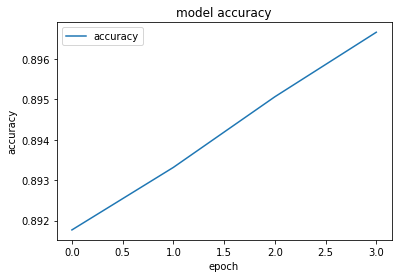

In [75]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.show()

#### 3.10 今度は検証データに対する評価結果を確認してみましょう。誤差と正解率を算出して下さい。

In [76]:
loss, accuracy = model.evaluate(X_test,y_test,verbose=False)
print('loss',loss)
print('accuracy',accuracy)

loss 0.3791668117046356
accuracy 0.9017000198364258


#### 3.11 「3.8」の条件と、中間層を「1つ」追加した時と「2つ」追加した時の「モデルサマリ」、「正解率推移」、「評価指標」を確認して下さい。※今までの処理を関数化するイメージです。中間層の入力数と出力数は「32」で設定しましょう。

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
600/600 [==============================] - 2s 2ms/step - loss: 2.0217 - accuracy: 0.4893
Epoch 2/4
600/600 [==============================] - 1s 2ms/step - loss: 1.5648 - accuracy: 0.6870
Epoch 3/4
600/600 [==============================] - 1s 2ms/step - loss: 1.2472 - accuracy: 0.7523
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.9392 - accuracy: 0.8156


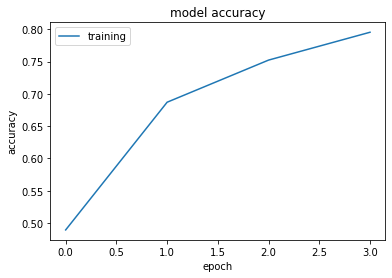

accuracy 0.8155999779701233
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
600/600 [==============================] - 2s 2ms/step - loss: 2.3065 - accuracy: 0.1363
Epoch 2/4
600/600 [==============================] - 2s 3ms/step - loss: 2.2615 - accuracy: 0.2683
Epoch 3/4
600/600 [==============================] - 1s 2ms/step - loss: 2.2186 - accura

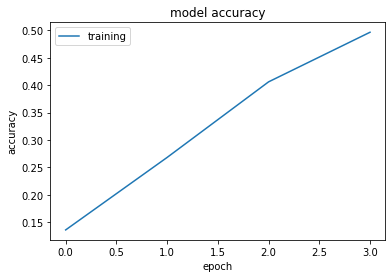

accuracy 0.5015000104904175
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                25120     
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
600/600 [==============================] - 2s 3ms/step - loss: 2.3079 - accuracy: 0.1124
Epoch 2/4
600/600 [==============================] - 2s

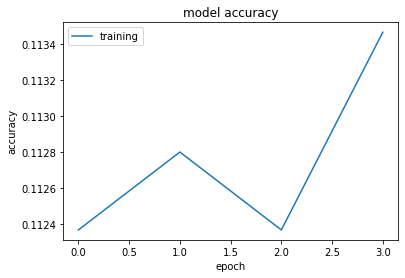

accuracy 0.11349999904632568


In [77]:
image_size = 784
num_classes = 10
activation = 'sigmoid'

def create_model(layer_num,activation):
    model = Sequential()
    model.add(Dense(layer_num[0], activation=activation, input_shape=(image_size,)))

    for s in layer_num[1:]:
        model.add(Dense(units = s, activation =activation))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=100, epochs=4):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)
    loss, accuracy  = model.evaluate(X_test, y_test)
    
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training'])
    plt.show()
    print("accuracy",accuracy)
    
for layers in range(1, 4):
    model = create_model([32] * layers,activation)
    evaluate(model)

#### 3.12 層を増やせば増やすほど、学習データの精度が劣化していることが確認できました。次は「3.11」の「中間層を2層追加した状態」でエポック数を40回に設定し、学習データの精度の推移を確認して下さい。

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                25120     
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
600/600 [==============================] - 3s 4ms/step - loss: 2.3298 - accuracy: 0.1040
Epoch 2/40
600/600 [==============================] - 2s 3ms/step - loss: 2.3002 -

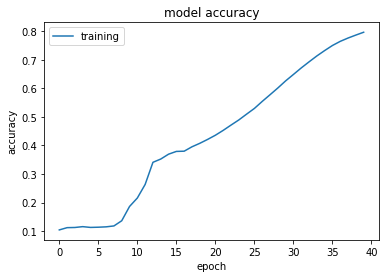

accuracy 0.8075000047683716


In [78]:
model = create_model([32] * 3,'sigmoid')
evaluate(model,epochs=40)

#### 3.13 「3.12」の条件に加えてepochsを「10」で設定し、学習データと検証データの「誤差」の推移を確認してグラフを出力して下さい。※モデルを初期化する必要はないです。

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.7395 - accuracy: 0.8047 - val_loss: 0.7204 - val_accuracy: 0.8151
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.7155 - accuracy: 0.8117 - val_loss: 0.6965 - val_accuracy: 0.8239
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.6933 - accuracy: 0.8183 - val_loss: 0.6747 - val_accuracy: 0.8290
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.6727 - accuracy: 0.8240 - val_loss: 0.6545 - val_accuracy: 0.8343
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.6536 - accuracy: 0.8292 - val_loss: 0.6357 - val_accuracy: 0.8373
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.6358 - accuracy: 0.8340 - val_loss: 0.6188 - val_accuracy: 0.8414
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.6193 - accuracy: 0.8378 - val_loss: 0.6022 - val_accuracy: 0.8447
Epoch 

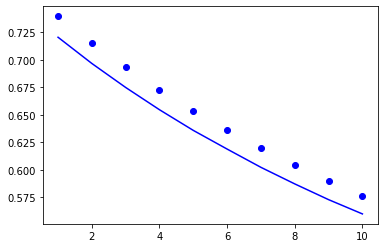

In [79]:
history = model.fit(X_train,y_train,epochs = 10,batch_size = 100,validation_data=(X_test,y_test))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values) + 1)

plt.plot(epochs,loss_values,'bo',label='training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.show()

#### 3.14「学習データ」、「検証データ」共に、誤差が減少していることが分かります。複雑なモデルには、沢山の学習が必要なようです。今度は中間層無しで入力数を[32, 64, 128, 256]と変更したときの。学習データの精度を確認してみましょう。

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                25120     
                                                                 
 dense_16 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
600/600 [==============================] - 2s 3ms/step - loss: 2.0522 - accuracy: 0.4603
Epoch 2/4
600/600 [==============================] - 2s 3ms/step - loss: 1.6019 - accuracy: 0.6745
Epoch 3/4
600/600 [==============================] - 1s 2ms/step - loss: 1.2816 - accuracy: 0.7421
Epoch 4/4
313/313 [==============================] - 1s 1ms/step - loss: 0.9655 - accuracy: 0.8043


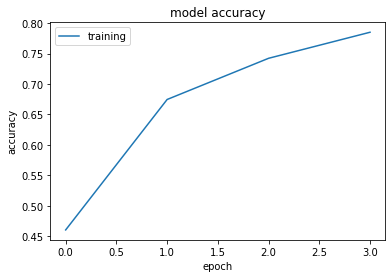

accuracy 0.8043000102043152

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 64)                50240     
                                                                 
 dense_18 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
600/600 [==============================] - 2s 3ms/step - loss: 1.9921 - accuracy: 0.5422
Epoch 2/4
600/600 [==============================] - 2s 3ms/step - loss: 1.4534 - accuracy: 0.7582
Epoch 3/4
600/600 [==============================] - 2s 3ms/step - loss: 1.0980 - accuracy: 0.8013
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.7962 - accuracy: 0.8442


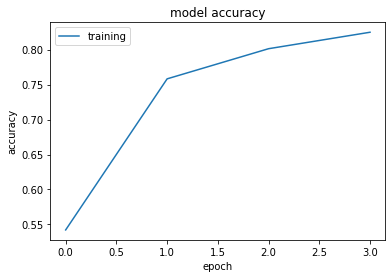

accuracy 0.8442000150680542

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 128)               100480    
                                                                 
 dense_20 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
600/600 [==============================] - 2s 3ms/step - loss: 1.9304 - accuracy: 0.5719
Epoch 2/4
600/600 [==============================] - 2s 3ms/step - loss: 1.3536 - accuracy: 0.7665
Epoch 3/4
600/600 [==============================] - 3s 5ms/step - loss: 1.0010 - accuracy: 0.8141
Epoch 4/4
313/313 [==============================] - 1s 3ms/step - loss: 0.7180 - accuracy: 0.8517


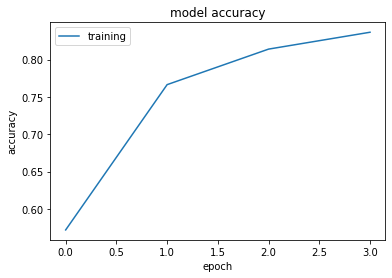

accuracy 0.8517000079154968

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 256)               200960    
                                                                 
 dense_22 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
600/600 [==============================] - 5s 7ms/step - loss: 1.9350 - accuracy: 0.5641
Epoch 2/4
600/600 [==============================] - 3s 5ms/step - loss: 1.3209 - accuracy: 0.7687
Epoch 3/4
600/600 [==============================] - 3s 5ms/step - loss: 0.9629 - accuracy: 0.8181
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.6884 - accuracy: 0.8505


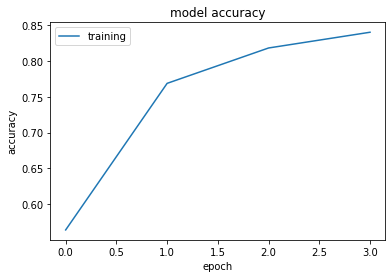

accuracy 0.8504999876022339



In [80]:
for nodes in [32, 64, 128, 256]:
    model = create_model([nodes],'sigmoid')
    evaluate(model)
    print()

#### 3.15 入力数を増やした結果、層を増やした結果より効果が得られました。モデルは複雑になり過ぎず、簡単になり過ぎず、様々な条件を試行して、良いバランスを目指す必要があります。活性化関数を「relu」に変更し、その他は「3.11」の条件で精度を確認してみて下さい。

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 32)                25120     
                                                                 
 dense_24 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
600/600 [==============================] - 3s 3ms/step - loss: 1.2192 - accuracy: 0.7084
Epoch 2/4
600/600 [==============================] - 2s 3ms/step - loss: 0.5364 - accuracy: 0.8650
Epoch 3/4
600/600 [==============================] - 1s 2ms/step - loss: 0.4259 - accuracy: 0.8844
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.3447 - accuracy: 0.9056


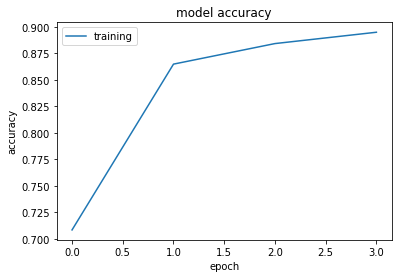

accuracy 0.9056000113487244
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                25120     
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
600/600 [==============================] - 2s 3ms/step - loss: 1.4304 - accuracy: 0.5908
Epoch 2/4
600/600 [==============================] - 2s 4ms/step - loss: 0.5706 - accuracy: 0.8445
Epoch 3/4
600/600 [==============================] - 2s 3ms/step - loss: 0.4264 - accur

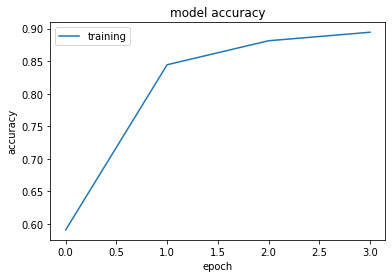

accuracy 0.90420001745224
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 32)                25120     
                                                                 
 dense_29 (Dense)            (None, 32)                1056      
                                                                 
 dense_30 (Dense)            (None, 32)                1056      
                                                                 
 dense_31 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
600/600 [==============================] - 2s 3ms/step - loss: 1.6365 - accuracy: 0.5191
Epoch 2/4
600/600 [==============================] - 2s 

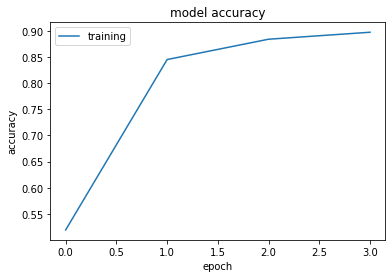

accuracy 0.9036999940872192


In [81]:
image_size = 784
num_classes = 10
activation = 'relu'

for layers in range(1,4):
  model = create_model([32] * layers,activation)
  evaluate(model)

#### 3.16 活性化関数は「sigmoid」ではなく「relu」を使用した方が、一般的には良い精度が得られることが多いです。compileの最適化関数も変更してみましょう。「sgd」から「rmsprop」に変更して精度を確認して下さい。※データによって「最適なモデル」の条件は異なります。様々な観点で試行していくことが重要です。

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                25120     
                                                                 
 dense_33 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
600/600 [==============================] - 2s 3ms/step - loss: 1.2288 - accuracy: 0.6730
Epoch 2/4
600/600 [==============================] - 1s 2ms/step - loss: 0.5573 - accuracy: 0.8568
Epoch 3/4
600/600 [==============================] - 2s 3ms/step - loss: 0.4377 - accuracy: 0.8816
Epoch 4/4
313/313 [==============================] - 1s 2ms/step - loss: 0.3553 - accuracy: 0.9017


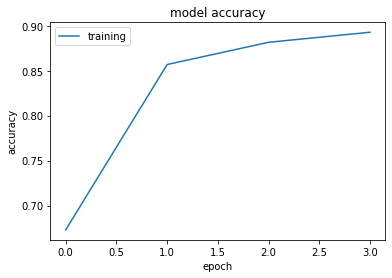

accuracy 0.9017000198364258
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 32)                25120     
                                                                 
 dense_35 (Dense)            (None, 32)                1056      
                                                                 
 dense_36 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
600/600 [==============================] - 2s 3ms/step - loss: 1.3387 - accuracy: 0.6163
Epoch 2/4
600/600 [==============================] - 2s 4ms/step - loss: 0.5152 - accuracy: 0.8602
Epoch 3/4
600/600 [==============================] - 2s 3ms/step - loss: 0.3920 - accur

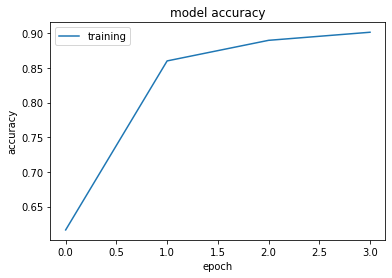

accuracy 0.9075000286102295
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 32)                25120     
                                                                 
 dense_38 (Dense)            (None, 32)                1056      
                                                                 
 dense_39 (Dense)            (None, 32)                1056      
                                                                 
 dense_40 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4
600/600 [==============================] - 2s 3ms/step - loss: 1.5357 - accuracy: 0.5446
Epoch 2/4
600/600 [==============================] - 2

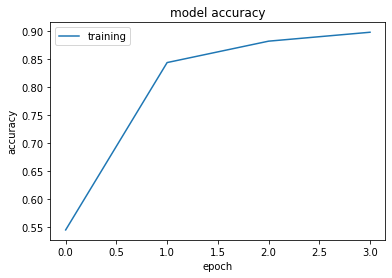

accuracy 0.9017000198364258


In [82]:
image_size = 784
num_classes = 10
activation = 'relu'
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


for layers in range(1, 4):
    model = create_model([32] * layers,activation)
    evaluate(model)

#### 3.17 約90%程度正解率があるようです。「3.16」で作成したモデルで（X_test[0]）に対して予測結果を出力してみましょう。

In [83]:
model.predict(X_test)[0]

313/313 [==============================] - 1s 1ms/step


array([7.7127901e-05, 2.2091961e-06, 5.3535384e-04, 6.1605396e-03,
       4.2603597e-06, 2.6556039e-05, 5.6503872e-08, 9.9093431e-01,
       1.0560372e-05, 2.2490283e-03], dtype=float32)

#### 3.18 配列のままだと少し分かりづらいので、結果をグラフ化してみましょう。

313/313 [==============================] - 0s 2ms/step


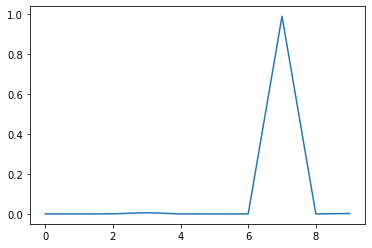

In [84]:
pd.Series(model.predict(X_test)[0]).plot()

#### 3.19 「7」と言う予測結果が出ています。「1.9」の方法で実際のデータの結果を確認してみましょう。

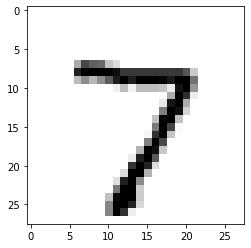

In [86]:
digit = X_test[0].reshape(28,28)
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

### 4.CNNについて学習します。

#### 4.1 Sequentialのクラスを読み込み、modelという変数に格納して下さい。※先程作成したモデルが初期化されます。

In [87]:
from keras import layers
from keras import models
model = models.Sequential()
model

#### 4.2 CNNの入力は画像の形式のまま扱う必要があります。X_trainとX_testの形状を画像の形式に変更して下さい。

In [88]:
X_train = X_train.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))
print('X_train',X_train.shape)
print('X_test',X_test.shape)

X_train (60000, 28, 28, 1)
X_test (10000, 28, 28, 1)


#### 4.3 CNNを構築していきましょう。先ずは活性化関数を「relu」に設定してコンボリューション層を追加し、summaryを出力して下さい。※ヒント：output shapeの形からストライド（移動する幅）の数を推定しましょう。

In [89]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


#### 4.4 CNNはコンボリューション層とプーリング層を交互に組み合わせます。プーリング層を追加し、summaryを出力して下さい。※ヒント：output shapeの形からpool_sizeの数を推定しましょう。

In [90]:
model.add(layers.MaxPooling2D(2,2))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


#### 4.5 「4.3」と同じ要領でコンボリューション層を追加しましょう。

In [91]:
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


#### 4.6 コンボリューション層とプーリング層の出力が3次元であることが分かります。また画像のサイズ（高さ、幅）は層を経るにつれて、縮小していることが分かります。次の手順は3次元の出力をDense層に入力することですが、その前に1次元に変換する必要があります。1次元に変換する「変換層」を追加し、summaryの内容を確認して下さい。

In [92]:
model.add(layers.Flatten())
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
Total params: 9,568
Trainable params: 9,568
Non-trainable params: 0
_________________________________________________________________


#### 4.7 Dense層を追加した後、ソフトマックス関数を用いて、出力層を追加して下さい。

In [93]:
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense_41 (Dense)            (None, 32)                123936    
                                                                 
 dense_42 (Dense)            (None, 10)                330       
                                                     

#### 4.8 「3.5」の条件でcompileを設定し、epochsは「4」、batch_sizeは「100」に設定して学習を行って下さい。

In [94]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=4,batch_size=100)

Epoch 1/4
600/600 [==============================] - 44s 73ms/step - loss: 0.9258 - accuracy: 0.7429
Epoch 2/4
600/600 [==============================] - 43s 72ms/step - loss: 0.3087 - accuracy: 0.9075
Epoch 3/4
600/600 [==============================] - 44s 74ms/step - loss: 0.2479 - accuracy: 0.9254
Epoch 4/4
600/600 [==============================] - 44s 73ms/step - loss: 0.2089 - accuracy: 0.9383


#### 4.9 CNNを使用することでかなりの高精度が実現できました。画像データは良い特徴量を内部で作り出せるCNNが適しています。最後に最適化手法の「rmsprop」を「4.8」と同様の条件で学習を行って下さい。※モデルは初期化して下さい。

In [95]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=4,batch_size=100)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 flatten_1 (Flatten)         (None, 3872)              0         
                                                                 
 dense_43 (Dense)            (None, 32)                123936    
                                                                 
 dense_44 (Dense)            (None, 10)                330       
                                                     

#### 4.10 学習データに対して約99%程度正解率があるようです。「4.9」で作成したモデルで（X_test[0]）に対して予測結果を出力してみましょう。※「3.17」と数字を比較して見て下さい。

In [96]:
model.predict(X_test)[0]

313/313 [==============================] - 3s 8ms/step


array([2.1259047e-11, 4.9685134e-10, 1.5941087e-07, 5.7175004e-07,
       8.6875938e-13, 3.8373449e-12, 2.0191947e-19, 9.9999923e-01,
       1.8933423e-10, 1.1341392e-09], dtype=float32)

#### 4.11 配列のままだと少し分かりづらいので、結果をグラフ化してみましょう。※ディープラーニングより「7」の値が1に近く、確信度が上がっていることが分かります。（より自信を持って「1」ということができている。）

313/313 [==============================] - 4s 11ms/step


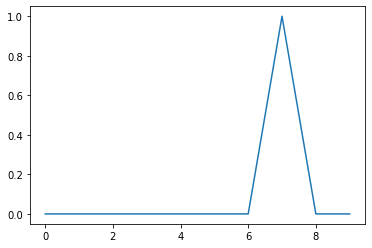

In [97]:
pd.Series(model.predict(X_test)[0]).plot()

#### 4.12 「7」と言う予測結果が出ています。「1.9」の方法で実際のデータの結果を確認してみましょう。

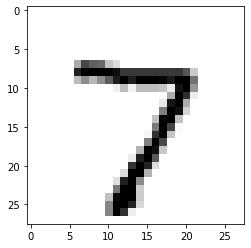

In [98]:
digit = X_test[0].reshape(28,28)
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

#### 4.13 コンボリューション層で行っている処理のイメージを掴んでみましょう。下記の様な5×5の乱数行列を作成して下さい。※seedを0で固定して下さい。

In [99]:
np.random.seed(seed=0)
img = np.random.random([5,5])
img

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ],
       [0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152],
       [0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215],
       [0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443]])

#### 4.14 コンボリューション層は画像データにカーネルをかけ合わせる（行列演算）を行うことで、畳み込まれた特徴を生成します。（特徴マップと言います）下記の様なカーネル（3×3の行列)を作成して下さい。※畳み込み操作を行う為のフィルタのことです。

In [100]:
a = np.array([[1,0,1],[0,1,0],[1,0,1]])
a

array([[1, 0, 1],
       [0, 1, 0],
       [1, 0, 1]])

#### 4.15 「4.14」で作成したカーネルを「4.13」の疑似画像データにかけ合わせて（行列演算）下記の様な特徴マップを出力して下さい。

In [101]:
def conv2(X, k):
    x_row, x_col = X.shape
    k_row, k_col = k.shape
    ret_row, ret_col = x_row - k_row + 1, x_col - k_col + 1
    ret = np.empty((ret_row, ret_col))
    for y in range(ret_row):
        for x in range(ret_col):
            sub = X[y : y + k_row, x : x + k_col]
            ret[y,x] = np.sum(sub * k)
    return ret

conv2(img,a)

array([[2.94893369, 3.60633711, 2.62916156],
       [2.98631118, 2.76766968, 3.90344315],
       [2.8200857 , 3.86679914, 1.99699116]])

#### 4.16 プーリング層のイメージを掴んでみましょう。4.13と同じ、5×5の乱数行列を作成して下さい。※seedを0で固定して下さい。

In [102]:
np.random.seed(seed=0)
img = np.random.random([5,5])
img

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ],
       [0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152],
       [0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215],
       [0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443]])

#### 4.17 下記の様な2×2の少領域毎に、最大の値を選択し、4×4の正方行列を作成して下さい。※Pooling層は大抵、Convolutoin層の後に適用されます。役割としては入力データをより扱いやすい形に変形するために、情報を圧縮することが目的です。「max_pooling」と呼ばれる処理になります。

In [103]:
out = np.zeros((4,4),dtype=np.float32)

for y in range(out.shape[0]):
    for x in range(out.shape[1]):
        out[y,x] = np.max(img[y:y+2,x:x+2])
out

array([[0.71518934, 0.891773  , 0.96366274, 0.96366274],
       [0.79172504, 0.891773  , 0.96366274, 0.96366274],
       [0.79172504, 0.83261985, 0.92559665, 0.92559665],
       [0.9786183 , 0.83261985, 0.83261985, 0.87001216]], dtype=float32)

### 5. RNNについて学習します

#### 5.0 事前準備　下記コードを読み込んで下さい。

In [104]:
# 頻度順位10000語までを指定
from keras.datasets import imdb
(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=10000)

# 元データのレビュー内容は例えば以下の様なデータが格納されています。
def decode_review(num):
    word_index = imdb.get_word_index()
    reversed_word_index = dict(
        [value, key] for (key, value) in word_index.items())

    decoded_review = ' '.join([reversed_word_index.get(i-3, '?') for i in X_train[num]])
    
    return decoded_review

decode_review(0)

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

#### 5.1 学習データ、検証データのデータ型を調べてみましょう。

In [105]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (25000,)
X_test (25000,)
y_train (25000,)
y_test (25000,)


#### 5.2 それぞれ25000行のデータが格納されている様です。学習データ「X_train[0]とX_train[1]」の中身を確認してみましょう。それぞれ「行数（単語数）」、「最大値」、「最小値」、「ユニーク数」を出力して下さい。

In [106]:
print("X_train[0]行数",len(X_train[0]))
print("X_train[0]最大値",np.array(X_train[0]).max())
print("X_train[0]最小値",np.array(X_train[0]).min())
print("X_train[0]ユニーク数",pd.Series(X_train[0]).nunique())
print("X_train[1]行数",len(X_train[1]))
print("X_train[1]最大値",np.array(X_train[1]).max())
print("X_train[1]最小値",np.array(X_train[1]).min())
print("X_train[1]ユニーク数",pd.Series(X_train[1]).nunique())

X_train[0]行数 218
X_train[0]最大値 7486
X_train[0]最小値 1
X_train[0]ユニーク数 120
X_train[1]行数 189
X_train[1]最大値 9837
X_train[1]最小値 1
X_train[1]ユニーク数 121


#### 5.3 同様に学習データ（y_train）の中身を確認してみましょう。「行数」、「最大値」、「最小値」、「ユニーク数」を出力して下さい。

In [107]:
print("行数",len(y_train))
print("最大値",np.array(y_train).max())
print("最小値",np.array(y_train).min())
print("ユニーク数",pd.Series(y_train).nunique())

行数 25000
最大値 1
最小値 0
ユニーク数 2


#### 5.4 今回のデータは各レビューに対し、「0」か「1」の教師データが対応しているようです。そして、各レビュー内の単語に対し出現頻度の順位が数値として、各単語に割り当てられています。学習データの「行数」が異なるので揃えていきましょう。今回は「500」で設定して下さい。※ヒント：preprocessingのモジュールのsequenceを使用します。

In [108]:
from tensorflow.keras.preprocessing import sequence
X_train = sequence.pad_sequences(X_train,maxlen=500)
X_test = sequence.pad_sequences(X_test,maxlen=500)
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('X_train[0]',X_train[0])

X_train (25000, 500)
X_test (25000, 500)
X_train[0] [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0

#### 5.5 説明変数のサイズが揃い、準備は整いました。現在扱っている「テキストデータ」や「時系列データ等」、データの「順序」に意味があるデータに関しては、一般的なディープラーニングやCNNより、RNNのほうが適しています。それでは、RNNを実装してみましょう。layersクラスから「Embedding」、「SimpleRNN」を読み込んで下さい。

In [109]:
from keras.layers import Embedding,SimpleRNN
print(Embedding)
print(SimpleRNN)

<class 'keras.layers.core.embedding.Embedding'>
<class 'keras.layers.rnn.simple_rnn.SimpleRNN'>


#### 5.6 Sequentialのクラスを読み込み、modelという変数に格納して下さい。※モデルが初期化されます。

In [110]:
model = Sequential()
model

#### 5.7 Embedding層を追加して下さい。Embeddingとは単語や文を固定のベクトルに置き換える処理のことです。出力数は「10」を設定しましょう。※Embeddingは本来は特徴量エンジニアリングに分類されます。

In [111]:
model.add(Embedding(10000,10))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 10)          100000    
                                                                 
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


#### 5.8 RNN層を追加して下さい。

In [112]:
model.add(SimpleRNN(30))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 10)          100000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 30)                1230      
                                                                 
Total params: 101,230
Trainable params: 101,230
Non-trainable params: 0
_________________________________________________________________


#### 5.9 出力層を追加しましょう。活性化関数はシグモイドを設定して下さい。

In [113]:
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 10)          100000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 30)                1230      
                                                                 
 dense_45 (Dense)            (None, 1)                 31        
                                                                 
Total params: 101,261
Trainable params: 101,261
Non-trainable params: 0
_________________________________________________________________


#### 5.10 compileの設定をしましょう。最適化関数を「rmsprop」を選択して下さい。誤差関数を「binary_crossentoropy」で設定し、metricsは「正解率」を設定してみましょう。※何を目的として重みを更新指定行くかを決定している部分になります。

In [114]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

#### 5.11 エポック数は「4」、バッチサイズは「100」、validation_splitを「0.2」に設定して学習を開始して下さい。

In [115]:
history = model.fit(X_train,y_train,epochs=4,batch_size=100,validation_split=0.2)

Epoch 1/4
200/200 [==============================] - 36s 167ms/step - loss: 0.6825 - acc: 0.5493 - val_loss: 0.6160 - val_acc: 0.6930
Epoch 2/4
200/200 [==============================] - 32s 162ms/step - loss: 0.4806 - acc: 0.7801 - val_loss: 0.5289 - val_acc: 0.7314
Epoch 3/4
200/200 [==============================] - 30s 149ms/step - loss: 0.3532 - acc: 0.8514 - val_loss: 0.4360 - val_acc: 0.8084
Epoch 4/4
200/200 [==============================] - 48s 240ms/step - loss: 0.2879 - acc: 0.8871 - val_loss: 0.3993 - val_acc: 0.8268


#### 5.12 「学習データ(acc)」、「検証データ(val_acc)」の精度をエポック毎にグラフを表示して下さい。

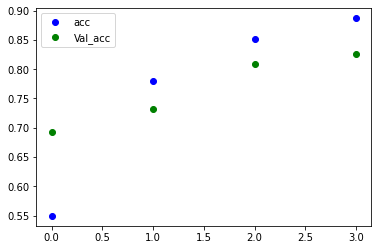

In [116]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='acc')
plt.plot(epochs,val_acc,'go',label='Val_acc')
plt.legend()
plt.show()

#### 5.13 学習データ・検証データに対して約80％以上の正解率があるようです。「5.12」で作成したモデルで（X_train[1]）に対して予測結果を出力してみましょう。

In [117]:
model.predict(X_train)[1]

782/782 [==============================] - 25s 32ms/step


array([0.1688557], dtype=float32)

#### 5.14 悪いレビューである可能性が高そうです。事前準備「5.0」を利用してレビュー内容を確認してみましょう。

In [118]:
decode_review(1)

"? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out 

#### 5.15 実際の正解データを確認していきましょう。y_train[1]のラベルを確認して下さい。

In [119]:
print('y_train[1]',y_train[1])

y_train[1] 0
